

## Name: ***Abrar Walid Ahmed***


## Recidivism Risk Classification





## COMPAS Dataset Description

The COMPAS Recidivism dataset was first released by ProPublica in 2016 and contains data on over 7,000 criminal defendants from Broward County, Florida, assessed between 2013 and 2014. Key fields include demographic attributes (age, sex, race), offense history metrics (juvenile felony/misdemeanor/other counts, adult priors count), current charge details (degree and description), and COMPAS-generated risk assessments (decile score and qualitative risk category). Outcome labels capture general two-year recidivism (‘is_recid’) enabling classification and fairness analyses.

## Set up

In [ ]:
pip install pandas

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:

# Load the data set
df = pd.read_csv("cox-violent-parsed_filt.csv")

# Drop censored/invalid case in the dataframe ('is_recid' = -1).
df = df[df['is_recid'] != -1]

# Select the key predictors
features = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree']
df = df[features + ['is_recid']]
# Drop any records missing these values.
df = df.dropna(subset=features)

          sex  age              race  juv_fel_count  juv_misd_count  \
0        Male   69             Other              0               0   
3        Male   34  African-American              0               0   
4        Male   24  African-American              0               0   
9        Male   23  African-American              0               1   
10       Male   43             Other              0               0   
...       ...  ...               ...            ...             ...   
18296    Male   44          Hispanic              0               0   
18298    Male   23         Caucasian              0               2   
18303  Female   34         Caucasian              0               0   
18311  Female   31  African-American              0               0   
18314  Female   23          Hispanic              0               0   

       juv_other_count  priors_count c_charge_degree  is_recid  
0                    0             0            (F3)         0  
3                

<Axes: xlabel='race'>

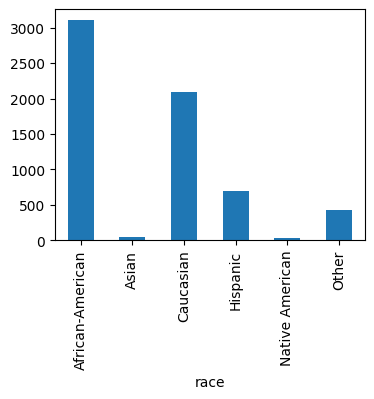

In [ ]:

df = df.drop_duplicates()
print (df)
print ("Filtered dataframe column and rows:", df.shape)

# Visualize the distribution information of race
GroupedData=df.groupby('race').size()
GroupedData.plot(kind='bar', figsize=(4,3))

<Axes: ylabel='count'>

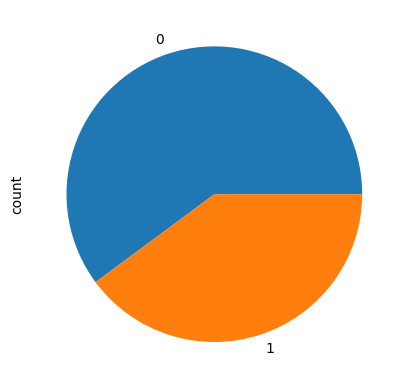

In [ ]:

# 'is_recid' indicates whether there's recidivism within two years (1), or no recidivism (0).
# This is what we would like to predict based on the dataset.
# Let's visualize it.
df["is_recid"].value_counts().plot.pie()

Random over-sampling:
is_recid
0    3848
1    3848
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='is_recid'>

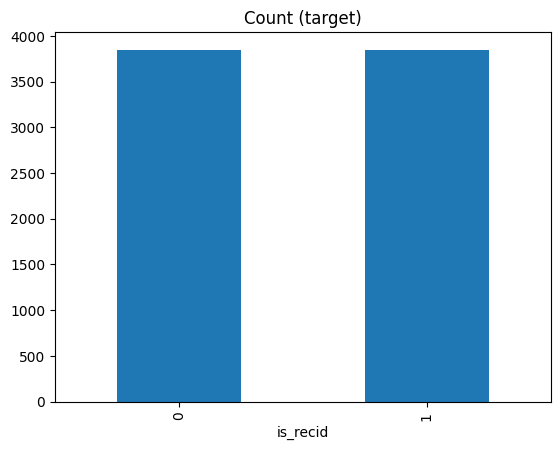

In [ ]:

# From the visualization above, we can see there are more no-recidivism cases compared to cases of recidivism.
# This imbalanced dataset is problematic for training a model.
# To handle imbalanced dataset in this assginment, we can over-sample the minority class.
# Name the oversampled df as "df_bal".

# Step 1: Count how many instances of each class exist in the 'is_recid' column
# count_0 = number of examples with is_recid == 0 (non-recidivists)
# count_1 = number of examples with is_recid == 1 (recidivists)
count_0 = df[df['is_recid'] == 0].shape[0]
count_1 = df[df['is_recid'] == 1].shape[0]
# Step 2: Create a new DataFrame containing only the non-recidivist samples (label 0)
df_is_recid_0 = df[df['is_recid'] == 0]

# Step 3: Create another DataFrame containing only the recidivist samples (label 1)
df_is_recid_1 = df[df['is_recid'] == 1]

# Step 4: Oversample the recidivist group (label 1) to match the size of the non-recidivist group (label 0)
df_is_recid_1_over = df_is_recid_1.sample(count_0, replace=True, random_state=42)

# Step 5: Concatenate the original non-recidivist group (label 0) and the oversampled recidivist group (label 1)
# This creates a new balanced dataset where both classes have the same number of samples
df_bal = pd.concat([df_is_recid_0, df_is_recid_1_over], axis=0).reset_index(drop=True)
##############################################
# Now let's visualize the balanced dataframe
# No actions needed for the following three lines of code.
print('Random over-sampling:')
print(df_bal["is_recid"].value_counts())
df_bal["is_recid"].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:


# Split the balanced dataframe into features X and labels y
# where X contains selected predictor columns, y contains the binary outcome 'is_recid'.
X = df_bal[features]
y = df_bal['is_recid']

# Now we split data into training and test dataset (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Task 2 (10 points)
TO DO:
1. Data Preprocessing:
   Some features, such as 'sex' and 'c_charge_degree', are categorical.\
   Others, such as 'age' and 'juv_misd_count', are numerical.\
   We need to convert categorical variables to numeric before we can use the data for our Machine Learnining models.
   1. **(2 marks)** Numeric features: **scale to zero mean and unit variance**.
   2. **(2 marks)** Categorical features: **Use one-hot encoding for categorical features**.
3. Model training and evaluation:
   1. **(3 marks)** Train a machine learning model for predicting recidivism with a machine learning algorithm discussed during the lectures **(Week 10 to Week 12)** (or any other appropriate algorithm not covered in the lectures). Which machine learning algorithm did you choose, and why? Report accuracy, confusion matrix.
   2. **(3 marks)** Train an **artificial neural network (Multi-Layered Perceptron Classifier (MLP))** model for recidivism prediction. Report accuracy, and confusion matrix.
  
Confusion matrix:
  
|                  | **Predicted Positive** | **Predicted Negative** |
|------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)       | False Negative (FN)      |
| **Actual Negative** | False Positive (FP)      | True Negative (TN)       |

In [ ]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder

# scale numerical variables to zero mean and unit variance for both traning and test dataset
numeric_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])


# Use one-hot encoding to encode categorical variables for both traning and test dataset
categorical_features = ['sex', 'race', 'c_charge_degree']
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_train_cat = ohe.fit_transform(X_train[categorical_features])
X_test_cat = ohe.transform(X_test[categorical_features])


# Now we can combine numeric and categorical arrays
# No actions needed for the following two lines of code.
X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed  = np.hstack([X_test_num,  X_test_cat])
##############################################

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
logisticRegression = LogisticRegression(max_iter=1000, random_state=42)
logisticRegression.fit(X_train_processed, y_train)


# Predictions
y_pred = logisticRegression.predict(X_test_processed)

# Report the results.
print("Logistic Regression Results:")
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Results:
Test accuracy:  0.624025974025974
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61       770
           1       0.61      0.66      0.64       770

    accuracy                           0.62      1540
   macro avg       0.62      0.62      0.62      1540
weighted avg       0.62      0.62      0.62      1540

Confusion Matrix:
 [[450 320]
 [259 511]]


##Task 2 -##
2.1) I chose Logistic Regression as it is often used for binary classification tasks such as predicting whether an individual will reoffend (recidivism = 1) or not (recidivism = 0). It is known for being interpretable, efficient and baseline-appropriate.
The model performs slightly better at predicting recidivism (recall = 0.66) than predicting non-recidivism (recall = 0.58), the confusion matrix shows a notable number of false positives (320) which can raise fairness considerations.



In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_processed, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_processed)

# Report the results.
print("MLP Classifier Results:")
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

MLP Classifier Results:
Test accuracy:  0.6246753246753247
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.63       770
           1       0.63      0.60      0.62       770

    accuracy                           0.62      1540
   macro avg       0.62      0.62      0.62      1540
weighted avg       0.62      0.62      0.62      1540

Confusion Matrix:
 [[497 273]
 [305 465]]


2.2) The MLP classifier achieved comparable accuracy to logistic regression, with slightly better performance on non-recidivists, slightly worse on recidivists, and shows potential for improvement with further tuning.

## Task 3 (10 points)
1. **(2 marks)** For the neural network model, calculate False Positive Rate **by race**.

    Confusion matrix:
  
|                  | **Predicted Positive** | **Predicted Negative** |
|------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)       | False Negative (FN)      |
| **Actual Negative** | False Positive (FP)      | True Negative (TN)       |


False Positive Rate (FPR) tells you how often negative instances (not recidivate) are incorrectly classified as positive (recidivate).
Based on the confusion matrix, FPR is calculated as:

<p style="text-align:center;">False Positive Rate (FPR) = FP / (FP + TN)</p>

2. **(8 marks)** Reflect on the disparities you observed in the assignment.
    - Are there any differences in False Positive Rates between races?
    - Are there potential sources of bias in the data?
    - Describe what steps you would recommend for alleviating such bias in the intended classification model.
    - Discuss the trade-offs and potential impacts of your chosen strategies on overall model performance and fairness.

African-American: False Positive Rate (FPR)=0.512
Caucasian: False Positive Rate (FPR)=0.290
Other: False Positive Rate (FPR)=0.123
Hispanic: False Positive Rate (FPR)=0.204
Asian: False Positive Rate (FPR)=0.100
Native American: False Positive Rate (FPR)=0.000


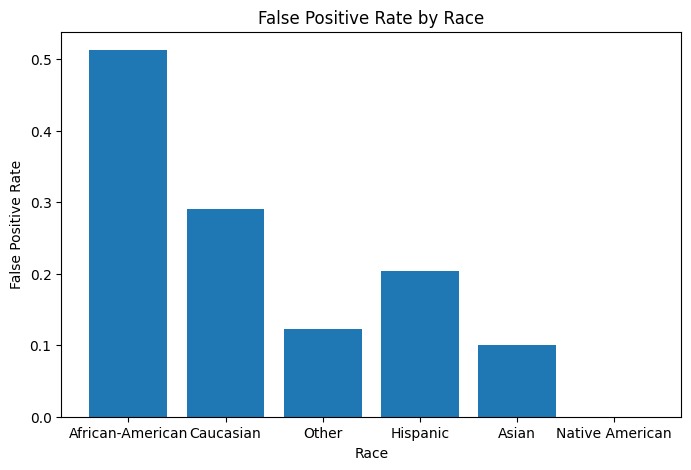

In [ ]:

import matplotlib.pyplot as plt

# To calculate FPR by race, first get the indices of each race category
# Create a dictionary to store the list of row indices for each race category
index_dict = {}

# Reset indices of X_test and y_test so they align with indexing of y_pred
# as X_test and y_test were split from a larger DataFrame (the original dataframe)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# For each row in the test set, add its index to the corresponding race category
for idx, race_category in X_test['race'].items():
    if race_category in index_dict:
         index_dict[race_category].append(idx)
    else:
         index_dict[race_category] = [idx]


# Compute FPR for each race group
# Iterate over each race category
all_fpr = []
for race in index_dict.keys():
    indices = index_dict[race]

    actual = y_test.loc[indices]
    predicted = y_pred[indices]

    # Count False Positives:
    # These are the cases where the model predicted recidivism (1)
    # but the actual label is non-recidivism (0)
    num_false_positive = sum((predicted == 1) & (actual == 0))

    # Count True Negatives:
    # These are the cases where the model correctly predicted non-recidivism (0)
    num_true_negative = sum((predicted == 0) & (actual == 0))

    # Calculate False Positive Rate (FPR) based on the formula.
    # FPR = FP / (FP + TN)
    if (num_false_positive + num_true_negative) > 0:
        fpr = num_false_positive / (num_false_positive + num_true_negative)
    else:
        fpr = 0

    all_fpr.append(fpr)
    print(f"{race}: False Positive Rate (FPR)={fpr:.3f}")


# Visualization

plt.figure(figsize=(8, 5))
races = index_dict.keys()
plt.bar(races, all_fpr)
plt.xlabel('Race')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate by Race')
plt.show()

#

####Are there any differences in False Positive Rates between races?
Yes, the false positive rates vary by race. African-American defendants have the highest FPR (0.51), while groups like Asian and Native American have much lower rates. This suggests that the model is more likely to wrongly label African-American individuals as likely to reoffend compared to others.






####Are there potential sources of bias in the data?
Yes, the dataset reflects real-world arrest and sentencing practices, which may carry historical and systemic biases. For instance, over-representation of African-American individuals and imbalanced policing practices could skew the data and influence the model unfairly.

####What steps would you recommend for alleviating such bias?

1. Preprocessing techniques such as reweighting or resampling to balance representation across races.

2. Fairness constraints during model training (e.g. equalized odds, demographic parity).

3. Post-processing corrections like adjusting decision thresholds for different groups.

4. Review and evaluate features to ensure none indirectly reflect race-related information.

####What are the trade-offs and impacts of these strategies?

- Enforcing fairness constraints may slightly reduce overall model accuracy. However, it improves equity and trustworthiness, especially in high-stakes contexts like criminal justice.

- There’s a trade-off between individual-level predictive performance and group-level fairness, requiring careful policy consideration.
- Interpretability vs. fairness: Introducing fairness-enhancing techniques or using more complex models can reduce the clarity of how decisions are made, making it more difficult for stakeholders such as judges or parole officers to understand or justify the model’s outputs. This lack of transparency may impact trust and limit the model’s adoption in real-world settings